### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Preparation

*Clean and correct data types for accuracy.*

In [2]:
data = pd.read_csv('apps.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
#lets check the null values or empty rows
data.isna().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [4]:
#we cannot drop the rows with null in this data

#To get the count of the apps lets drop the duplicates or repeating rows
apps = data.drop_duplicates()
print('Total number of apps:',apps['App'].count())
apps.head()

Total number of apps: 9659


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
apps.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [6]:
#now lets remove unwanted characters from "Size,Price and Installs" to make then numeric coulmns

ch_rem=('+','$','M',',') #character which should be removed
col_name = ('Size','Installs','Price') #columns which should be changed

for col in col_name:
    for char in ch_rem:   #to check in each column
        apps[col]=apps[col].str.replace(char, '')  #replacing
    apps[col]=pd.to_numeric(apps[col])  #changing to numeric

In [7]:
apps.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

## 2. Category Exploration

*Investigate app distribution across categories.*

In [8]:
#Number of Categories
len_category = len(set(apps['Category']))
print('Number of Categories = ',len_category)

Number of Categories =  33


In [9]:
#apps count in ecah category
each_category = apps['Category'].value_counts().sort_values(ascending=False)
each_category

Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64

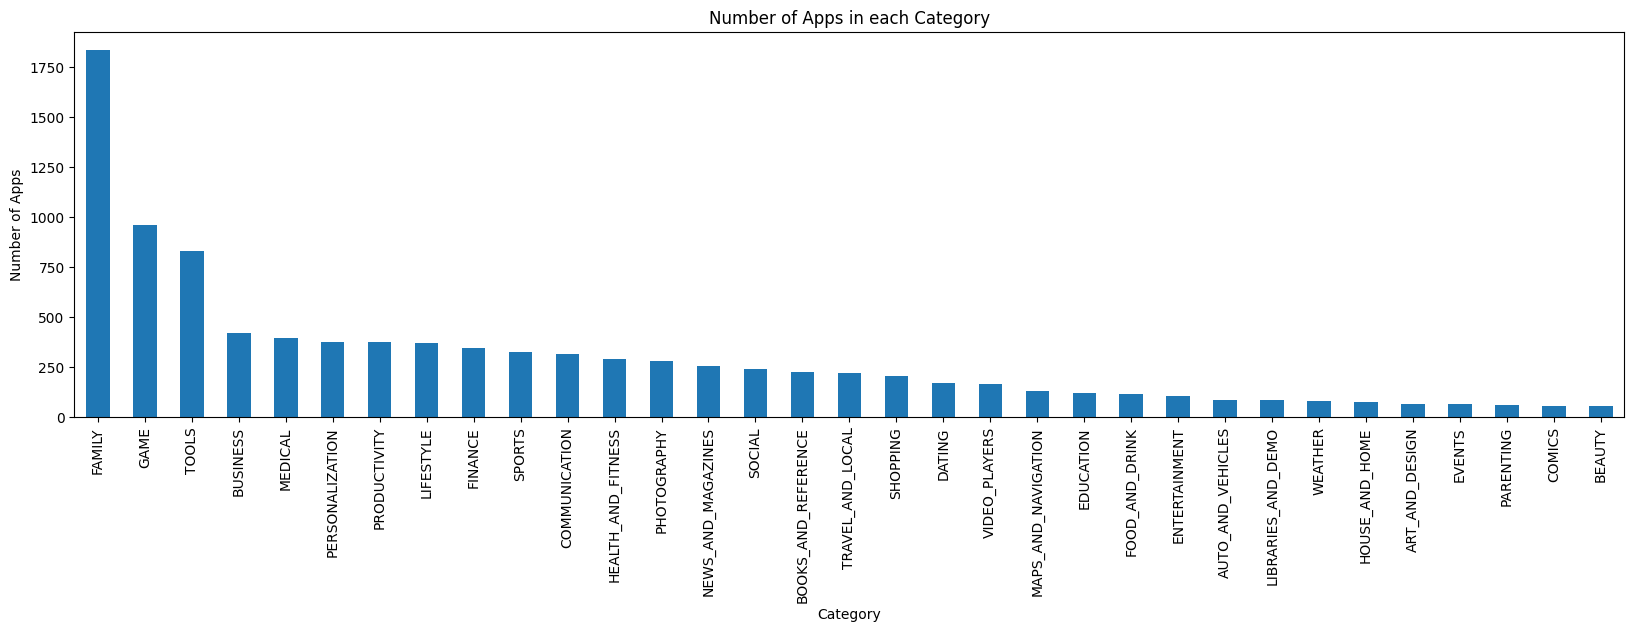

In [10]:
#Visualize the above data
plt.figure(figsize=(20,5))
each_category.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.title('Number of Apps in each Category')
plt.show()

*Family category has more number of apps(1832)*

## 3. Metric Analysis

*Examine app ratings, size, popularity, and pricing trends.*

In [11]:
#average app rating
avg_rating = apps['Rating'].mean()
print('Average app rating is',avg_rating)

Average app rating is 4.173243045387994


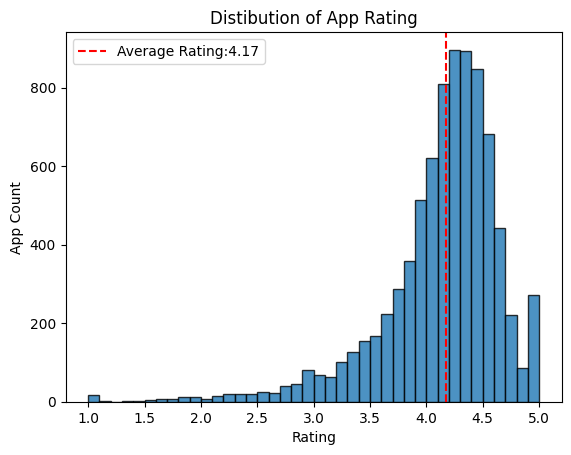

In [12]:
plt.xlabel('Rating')
plt.ylabel('App Count')
plt.title('Distibution of App Rating')

#plt the histogram for the Ratings Column
plt.hist(apps['Rating'],bins=np.arange(1,5.1,0.1),edgecolor='black',alpha=0.8) #bins is the ratings range

#now show the avg_rating value in the hist
plt.axvline(avg_rating,color='r',linestyle='--',label=f'Average Rating:{avg_rating:.2f}')
plt.legend()
plt.show()

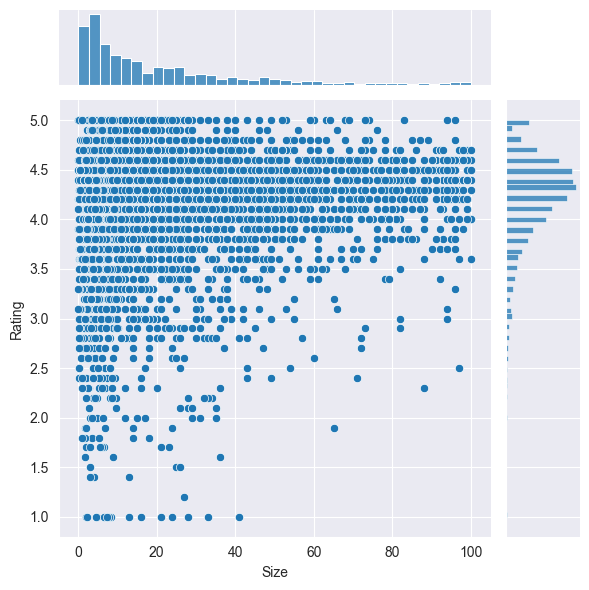

In [16]:
#Size vs Rating
sns.set_style(style="darkgrid") #to get more visible grid

#Apps in Category which has more than 250 apps
large_cat=apps.groupby('Category').filter(lambda x:len(x)>250).reset_index()
sns.jointplot(x='Size',y='Rating',data=large_cat)
plt.show()

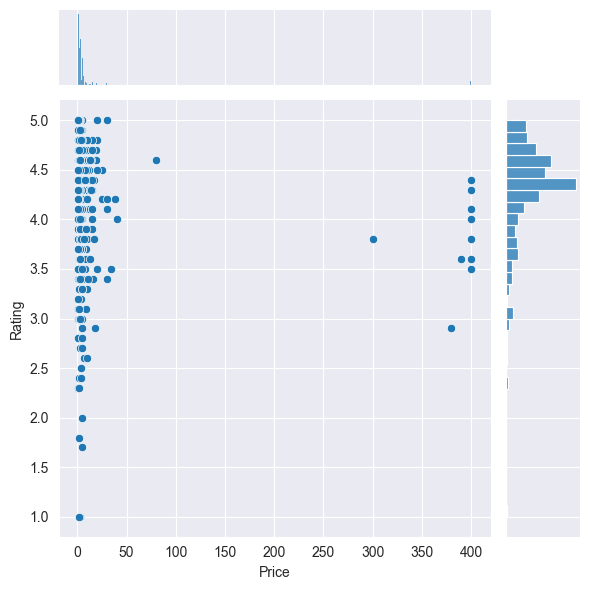

In [17]:
#Price vs Rating
sns.set_style("darkgrid")

#Get the paid apps data
paid_apps = apps[apps['Type']=='Paid']
sns.jointplot(x='Price',y='Rating',data=paid_apps)
plt.show()

Text(0.5, 1.0, 'App pricing trend across categories')

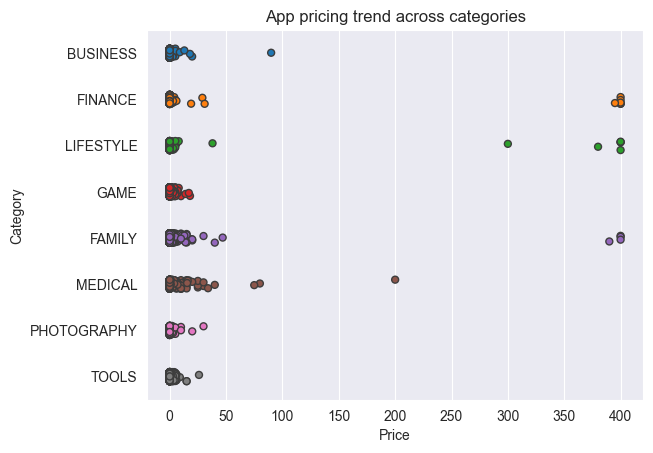

In [18]:
#Relation between Category and Price

sns.set_style("darkgrid")
#Popular Category apps
pop_cat_apps = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE', 'LIFESTYLE', 'BUSINESS'])]

sns.stripplot(x='Price',y='Category',data=pop_cat_apps,hue='Category',linewidth=1)
plt.title('App pricing trend across categories')

In [19]:
#lets get the data of the apps which have a price above 200
apps_price_200 = pop_cat_apps[['Category','App','Price']][pop_cat_apps['Price']>200]
apps_price_200

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


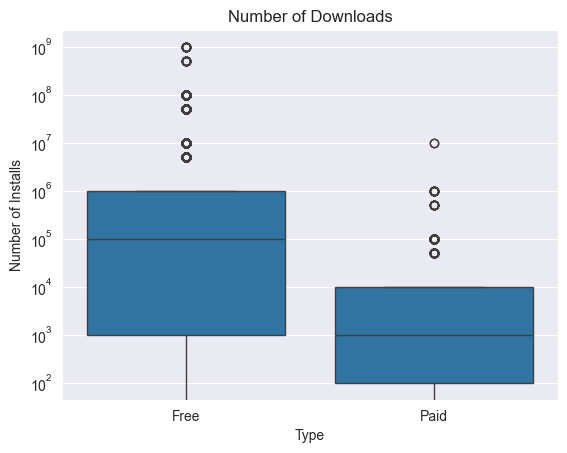

In [20]:
#Popularity of Paid apps and Free apps
sns.set_style("darkgrid")
sns.boxplot(x='Type',y='Installs',data=apps)
plt.yscale('log') #bcz the count is more

plt.title('Number of Downloads')
plt.ylabel('Number of Installs')
plt.show()

In [48]:
app_count = (apps.groupby(['Type'],as_index=False)
                    ['Installs'].sum())
print(f'Install Count of Free apps:{app_count.Installs[app_count.Type=='Free']} \nInstall Count of Paid apps{apps.Installs[apps.Type=='Paid']}')

Install Count of Free apps:0    75065572646
Name: Installs, dtype: int64 
Install Count of Paid apps1    57364881
Name: Installs, dtype: int64


## 4. Sentiment Analysis

*Assess user sentiments through reviews*

In [43]:
#read the reviews data
reviews_df = pd.read_csv('user_reviews.csv')
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [53]:
#make a dataframe by attaching the relevant review to relevant app.
apps_review = pd.merge(apps,reviews_df,on = 'App',how='inner')
apps_review.isna().sum()

App                           0
Category                      0
Rating                        0
Reviews                       0
Size                      20406
Installs                      0
Type                          0
Price                         0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   0
Android Ver                   0
Translated_Review         25627
Sentiment                 25622
Sentiment_Polarity        25622
Sentiment_Subjectivity    25622
dtype: int64

In [54]:
#drop NaN values in "Sentiment" and "Translated_Review"
apps_review = apps_review.dropna(subset=['Sentiment','Translated_Review'])
apps_review.isna().sum()

App                           0
Category                      0
Rating                        0
Reviews                       0
Size                      11860
Installs                      0
Type                          0
Price                         0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   0
Android Ver                   0
Translated_Review             0
Sentiment                     0
Sentiment_Polarity            0
Sentiment_Subjectivity        0
dtype: int64

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

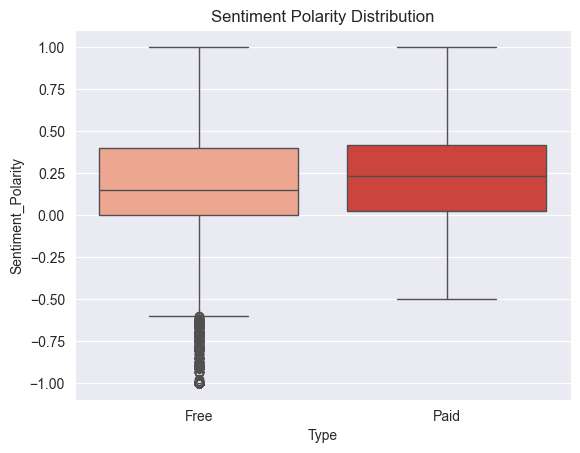

In [57]:
#Box plot to show the Sentiment Polarity to the Type of the apps

sns.boxplot(x='Type',y='Sentiment_Polarity',data=apps_review,palette='Reds',hue='Type')
plt.title('Sentiment Polarity Distribution')

### Insights

1.*There are 33 different App Category. In that "Family" category has the highest collection of apps which is 1832 apps.*\
2.*The Average Rating of the apps is 4.17. Majority of the highest rated apps have less Size and the cost is Less or Free.*\
3.*In the popular category apps Most Expensive apps are from the Family, Finance and Lifestyle Category.*\
4.*The apps which are Free of Cost are the Most downloaded apps.*\
5.*Paid Apps have no Negative Sentiment Polarity.*